32.072733877455676

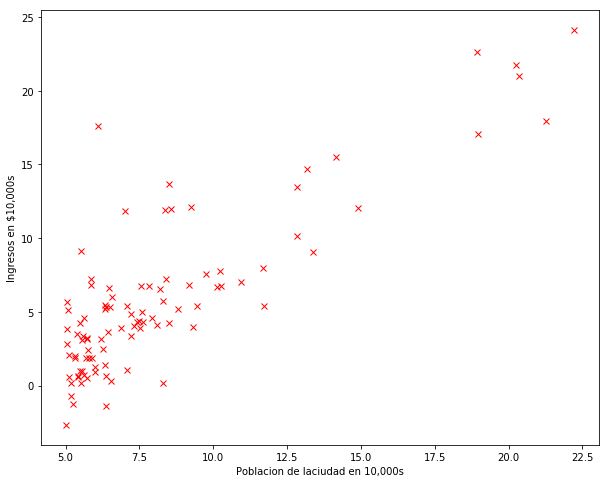

In [8]:
""" Ejercicio 1 
    Agustín Jofré Millet"""

import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from pandas.io.parsers import read_csv
from numpy.linalg import inv

"""1- Regresión lineal con una variable """

data = read_csv("ex1data1.csv", header=None).values
data.astype(float)



## x poblacion , y ingresos
x = data[:,0]
y = data[:,1]



#plotting 
plt.figure(figsize=(10,8))
plt.plot(x, y, 'rx')
plt.xlabel('Poblacion de laciudad en 10,000s')
plt.ylabel('Ingresos en $10,000s')


#tamaño del numero de observaciones
m = len(y)


X = np.ones(shape=(len(x), 2)) # creamos array np vacio de 1's
X[:, 1] = x # añadimos el de datos
theta = np.zeros(2)

#alpaha y iterations
iterations = 1500
alpha = 0.01


def cost_function(X, y, theta):
    """calculo del coste con los parametros, 
        dot mult matriz interna"""
    return np.sum((X.dot(theta)-y)**2)/2/m

cost_function(X, y, theta)



In [9]:
"""
    x = matriz[:,0]
    y = matriz[:,1]
    hip = theta0 + theta1 * x
    
    theta0 = theta0 - alpha / len(matriz) * np.sum((hip - y))
    theta1 = theta1 - alpha / len(matriz) * np.sum((hip - y) * x)

"""


def gradient_descent(X, y, theta, alpha, iterations):
    """
    calculo del descenso gradiente de aprender theta , 
    actualizando theta, con alpha
    """
    cost_history = [0] * iterations
    
    for i in range(iterations):
        hypothesis = X.dot(theta) #dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])
        perdida = hypothesis-y
        gradient = X.T.dot(perdida)/m
        theta = theta - alpha*gradient
        cost_history[i] = cost_function(X, y, theta)
        
    return theta, cost_history

(t, c) = gradient_descent(X,y,theta,alpha, iterations)

Text(0,0.5,'Ingresos en $10.000s')

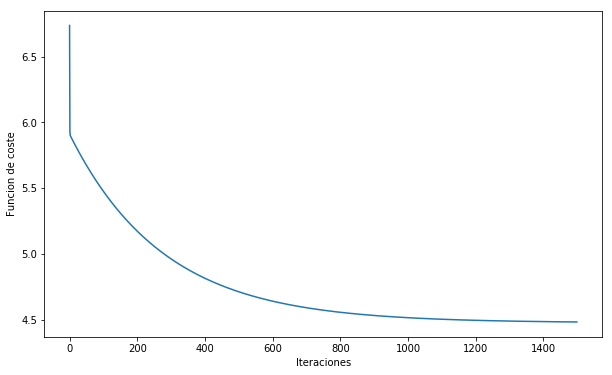

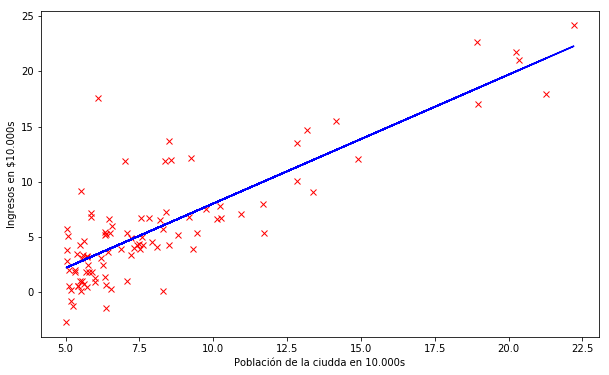

In [10]:
plt.figure(figsize=(10,6))
plt.plot(range(iterations), c)
plt.xlabel("Iteraciones")
plt.ylabel("Funcion de coste");

#figura final tras 1500 iteraciones parece coste reduce

plt.figure(figsize=(10,6))
plt.plot(x, y, 'rx')
plt.plot(x, t[0] + x*t[1], 'b')
plt.xlabel('Población de la ciudda en 10.000s')
plt.ylabel('Ingresos en $10.000s')    


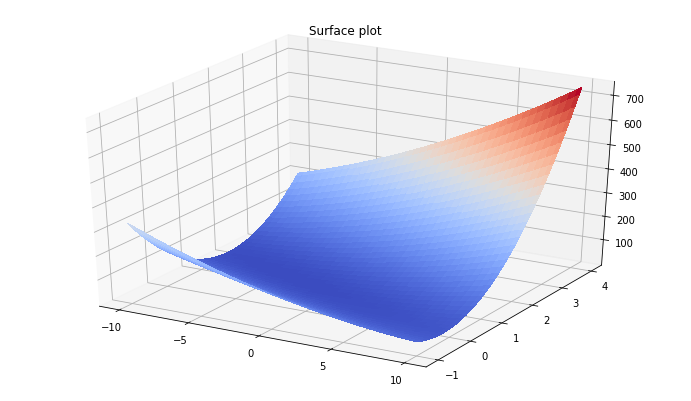

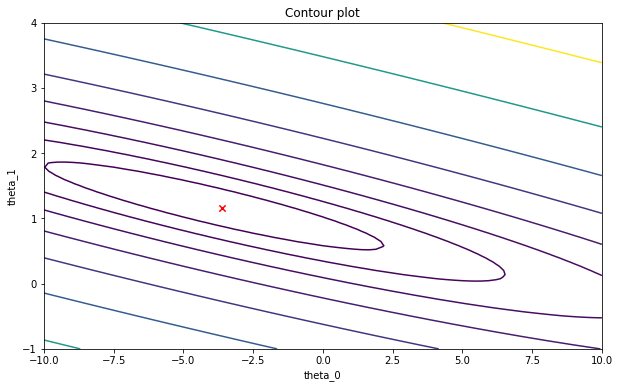

In [11]:

xModel = np.linspace(-10, 10,80)
yModel = np.linspace(-1, 4, 80)

Z = np.zeros((len(xModel), len(xModel)))


for i in np.arange(xModel.size):
    for j in np.arange(yModel.size):
        te = np.array([xModel[i], yModel[j]])
        Z[i, j] = cost_function(X, y, te)
        
Xm, Ym = np.meshgrid(xModel, yModel)

Z = Z.T #traspuesta

fig = plt.figure(figsize=(12,7))
ax = fig.gca(projection='3d')


#plot the surface:
ax.set_title('Surface plot')
ax.plot_surface(Xm, Ym, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xticks(np.linspace(-10, 10, 5))



# Contour plot:
ax = plt.figure(figsize=(10,6)).gca()
ax.set_title('Contour plot')
plt.contour(Xm, Ym, Z, np.logspace(-2, 3, 20))
ax.scatter(t[0],t[1], marker='x', color='r', s=40)
ax.set_xlabel(r'theta_0')
ax.set_ylabel(r'theta_1')
ax.set_yticks(np.arange(-1,4.5,1));



(0, 6)

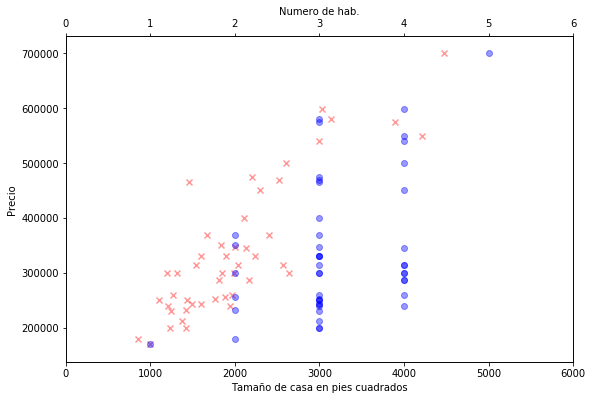

In [12]:
"""2 - Practica 1, Regresión con varias variables"""

#lectura acrchivo
data = read_csv("ex1data2.csv", header=None).values

x = data[:,:2].astype(float)
y = data[:,2].astype(float)


# Scatter plots:
fig = plt.figure(figsize=(20, 6))

ax1 = fig.add_subplot(121)


# Scatter plots:
ax1.scatter(x[:,0], y, marker='x', c='r', alpha=0.4)
ax1.set_xlabel('Tamaño de casa en pies cuadrados')
ax1.set_ylabel('Precio')
ax1.set_xlim(0, 6000)

ax3 = ax1.twiny()
ax3.scatter(x[:,1], y, marker='o', c='b', alpha=0.4)
ax3.set_xlabel('Numero de hab.')
ax3.set_xlim(0, 6)




In [13]:
#Normalizacion
"""Los vectores mu y sigma son necesarios para poder utilizar 
    el modelo ajustado por el método de descenso de gradiente para 
    hacer predicciones sobre otros ejemplos."""

""" Example
>>>  a = np . array ([[ 1 , 2 ], [ 3 , 4 ]])
>>>  np . mean ( a )
2.5
>>>  np . mean ( a , axis = 0 )
array([ 2.,  3.])
>>>  np . mean ( a , axis = 1 )
array([ 1.5,  3.5])"""
def normalizeAttributes(X):    
    # media y desviacion estandar:
    mu = np.mean(X, axis=0) #media de x en eje 0
    sigma = np.std(X, axis=0)  #Calcular la desviación estándar a lo largo del eje especificado
    
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

X, media, sigma = normalizeAttributes(x)

X = np.hstack((np.ones((X.shape[0],1)), X)) ## meto unos en la primera columan



[340179.38705047 107086.22759371  -4217.95977478]


Text(0,0.5,'Cost')

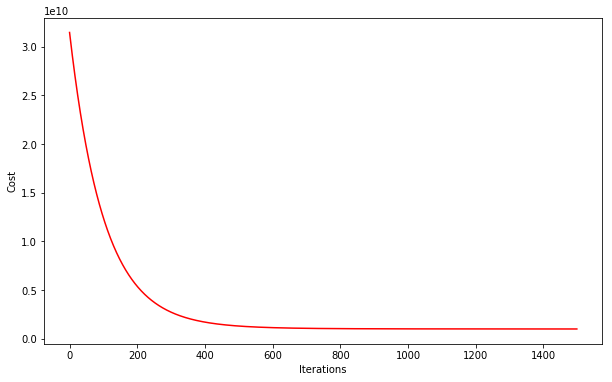

In [14]:
theta = np.zeros(3) #por lostres parametros

(t, c) = gradient_descent(X, y, theta, alpha, iterations)
print (t)

fig, ax = plt.subplots(figsize=(10,6))  
ax.plot(np.arange(iterations), c, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  


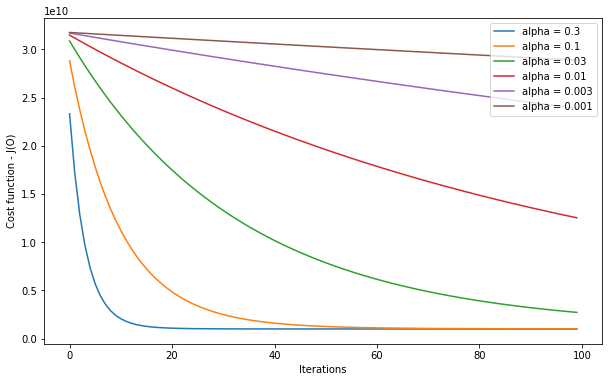

In [15]:
"""utilizar diferentes valores para la tasa 
de aprendizaje y construir una gráfica donde
se muestre la evolución de la función de coste J(O)
a medida que avanza el descenso de gradiente, con distintos
valores de tasa de aprendizaje (0.3, 0.1, 0.03, 0.01, ...)."""

tasaA = [0.3, 0.1, 0.03, 0.01, 0.003, 0.001]

fig, ax = plt.subplots(figsize=(10, 6))

for alfa in tasaA:
    t2, c2 = gradient_descent(X, y, theta, alfa, 100)
    ax.plot(c2, label='alpha = {0}'.format(alfa))
    
ax.set_ylabel("Cost function - J(O)")
ax.set_xlabel('Iterations')
ax.legend(loc='upper right')

    

In [16]:
"""resolver de nuevo el problema utilizando el método de la ecuación normal
    sin normalizar los atributos 
    O = (X^TX)^-1X^t.y"""
def EcuacionNormal(X, y):
    return np.dot(inv(np.dot(X.T, X)), np.dot(X.T, y))

(t, c) = gradient_descent(X, y, theta, 0.03, iterations) #se acercan ,mas los valores con esta tasa (alpha)

In [17]:
#normalizamos 
xNorm = (np.array([1650, 3]) - media) / sigma

#añado primera columna de 1s
xNorm = np.hstack((np.array([1]), xNorm))

sinEqNormal = np.dot(t, xNorm)
print(" Una casa con 1650 pies cuadrados y 3 hab. cuesta ", sinEqNormal)

 Una casa con 1650 pies cuadrados y 3 hab. cuesta  293082.30682623875


In [18]:

X = np.ones((len(x), 3))
X[:, 1:] = x
thetaNormal = EcuacionNormal(X, y)


In [19]:
xNorm = np.array([1, 1650, 3])
conEqNormal = np.dot(thetaNormal, xNorm)
print(" Una casa con 1650 pies cuadrados y 3 hab. cuesta ", conEqNormal)

 Una casa con 1650 pies cuadrados y 3 hab. cuesta  293081.4643348931
